## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
data.shape

(100, 8)

In [5]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

# Correlation of the Features

In [6]:
print("Correlation Between the Features")
print(data.drop(columns = ['target'] , axis = 1).corr())

Correlation Between the Features
                  x         y         z       x*x       2*y  2*z+3*x*x  \
x          1.000000 -0.205926  0.812458  0.997947 -0.205926   0.996252   
y         -0.205926  1.000000 -0.602663 -0.209289  1.000000  -0.261123   
z          0.812458 -0.602663  1.000000  0.807137 -0.602663   0.847163   
x*x        0.997947 -0.209289  0.807137  1.000000 -0.209289   0.997457   
2*y       -0.205926  1.000000 -0.602663 -0.209289  1.000000  -0.261123   
2*z+3*x*x  0.996252 -0.261123  0.847163  0.997457 -0.261123   1.000000   
w          0.583277 -0.401790  0.674486  0.583803 -0.401790   0.606860   

                  w  
x          0.583277  
y         -0.401790  
z          0.674486  
x*x        0.583803  
2*y       -0.401790  
2*z+3*x*x  0.606860  
w          1.000000  


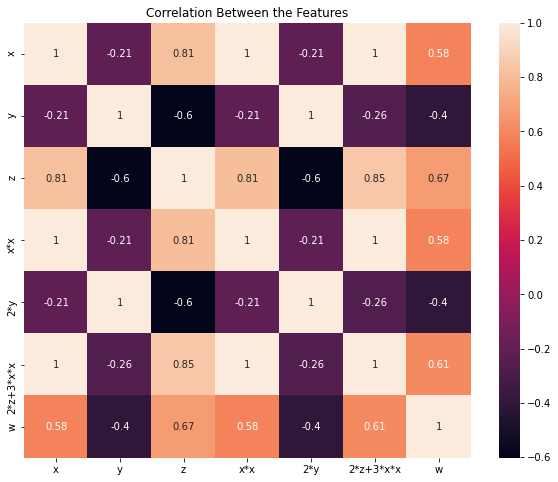

In [7]:
data_corr = data.drop(columns = ['target'],axis = 1)
plt.figure(figsize = (10,8))
sns.heatmap(data_corr.corr(),annot = True)
plt.title("Correlation Between the Features")
plt.show()

# Observation 

Correlation tells about how close two variables are to having a linear relationship with each other

Correlation is lies in the range between (-1,1)

1.-1 is represented as negative Corelated,Value 1 Represented as Posively Correlated and 0 represented as No relation
2.We can Observe the heatmap the feature X is Highly Correlated with Features X*X, 2*z+3*x*x and w
3.If the two Varible is highly Correlated means these features are Dependent to each other.While Build a model this feture 
the same,while build a model we can remove the highgly correlated feature,These features doing the same jobs build a model,
if we remove the features not affect our model features

##  2 . Finding the best model for the given data

In [8]:
#hyperparamter tuning
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
penalty = ['l2']
c = np.logspace(-4,4,5)
model = LogisticRegression()
grid = dict(penalty=penalty,C=c)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)

In [9]:
np.logspace(-4,4,5)

array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04])

In [10]:
print("best Param : {0}".format(grid_result.best_params_))
best_alpha = 0.0001
best_model = LogisticRegression(C = best_alpha, penalty = 'l2')
#train the model
logistic_best = best_model.fit(X,Y)
weight = logistic_best.coef_[0]
intercept = logistic_best.intercept_[0]
print("Weight : {0}".format(weight))
print("Intercept : {0}".format(intercept))

best Param : {'C': 0.0001, 'penalty': 'l2'}
Weight : [ 0.0035963  -0.00341973  0.00479983  0.00355269 -0.00341973  0.00377695
  0.00316971]
Intercept : 9.096934797740206e-10


In [11]:
def accuracy_score(actual_value,predicted_value):
    correct_class = 0
    for i in range(len(actual_value)):
        if actual_value[i] == predicted_value[i]:
            correct_class += 1
            
    return correct_class / len(actual_value)

In [12]:
#accuracy on training data
actual_value = Y
predicted_value = logistic_best.predict(X)
accuracy_score_logistic = accuracy_score(actual_value,predicted_value)
print("Accuracy_score for the Model Without adding Error  :{0}".format(accuracy_score_logistic))


Accuracy_score for the Model Without adding Error  :1.0


# Adding Small noise to every feature 

In [13]:
def add_noise_data(data,column):
    
    original_value = data[column].values 
    
    modified_feature_value = original_value + 0.01
    
    return modified_feature_value
    

In [14]:
noise_added_features = [ add_noise_data(data,column) for column in data.columns[:-1]]
X_dash = np.vstack(tuple(noise_added_features))
X_dash = X_dash.T

In [15]:
X_dash.shape

(100, 7)

In [16]:
def grid_search_cv(X,y,model,grid):
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X, Y)
    grid_result.best_params_
    return grid_result.best_params_

In [17]:
penalty = ['l2']
C =np.logspace(-4,4,5)
param_grid = dict(penalty=penalty,C=C)
model = LogisticRegression()
best_param = grid_search_cv(X_dash,Y,model,param_grid)
print("Best Param After Pertubation Test:{}".format(best_param) )


Best Param After Pertubation Test:{'C': 0.0001, 'penalty': 'l2'}


In [18]:
from sklearn.metrics import accuracy_score
best_C = best_param['C']
penalty = 'l2'
best_model_logistic = LogisticRegression(C = best_C,penalty = 'l2')
best_model_logistic.fit(X_dash,Y)
y_predict = best_model_logistic.predict(X_dash)
accuracy_score_adding_noise = accuracy_score(Y,y_predict)
print("Accuracy Score For After Pertubation Test ; {0}".format(accuracy_score(Y,y_predict)))


Accuracy Score For After Pertubation Test ; 1.0


In [19]:
weight_noise = best_model_logistic.coef_[0]
Intercept_adding_noise = best_model_logistic.intercept_[0]
print("Weight After Pertubation Test : {0}".format(weight_noise))

Weight After Pertubation Test : [ 0.00359617 -0.00341988  0.00480004  0.00355254 -0.00341988  0.00377683
  0.00316958]


In [20]:
# difference between the feature weight before and after pertubation test
diff_noise = weight_noise - weight
print("Weight differene : {0}".format(np.abs(diff_noise)))

#display the top four feature
four_feature_index = np.argsort(diff_noise).tolist()[:4]

data_feature = data.columns[:-1]

top_four_features = np.take(data_feature,four_feature_index)
print('Top four Features : {0}'.format(top_four_features))
print("Difference Between the Accuracy Score for two models : {0}".format(accuracy_score_adding_noise - accuracy_score_logistic))

Weight differene : [1.30431323e-07 1.45321783e-07 2.04625934e-07 1.53887588e-07
 1.45321783e-07 1.13731171e-07 1.22541126e-07]
Top four Features : Index(['x*x', 'y', '2*y', 'x'], dtype='object')
Difference Between the Accuracy Score for two models : 0.0


# Observation 

1.We Can Observe there is no difference in accuracy Score for Before and After Pertubation Tesing ( Adding SMall Noise In the Training Data).

2.Adding Noise for the Features weights is changes Slightly for the all the features.

3.top Four Featues X*X ,Y 2*Y and X is Multicollinear(i.e features are dependent to each Other)

# Multicollinear Checking For Support Vector Machine

In [21]:
#hyperparamter tuning
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
from sklearn.svm import LinearSVC
c = np.logspace(-4,4,5)
model = LinearSVC()
grid = dict(C=c)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)

In [22]:
best_c = grid_result.best_params_
print("best Param : {0}".format(best_c))
best_c = 0.0001
best_model = LinearSVC(C = best_c, penalty = 'l2')
#train the model
svC_best = best_model.fit(X,Y)
weight = svC_best.coef_[0]
intercept = svC_best.intercept_[0]
print("Weight : {0}".format(weight))
print("Intercept : {0}".format(intercept))

best Param : {'C': 0.0001}
Weight : [ 0.01323056 -0.01280974  0.01791372  0.01305589 -0.01280974  0.01391318
  0.01167827]
Intercept : 4.763807631789213e-11


In [23]:
#accuracy on training data
actual_value = Y
predicted_value = svC_best.predict(X)
accuracy_score_svc= accuracy_score(actual_value,predicted_value)
print("Accuracy_score for the Model Without adding Noise  :{0}".format(accuracy_score_svc))


Accuracy_score for the Model Without adding Noise  :1.0


In [24]:
noise_added_features = [ add_noise_data(data,column) for column in data.columns[:-1]]
X_dash = np.vstack(tuple(noise_added_features))
X_dash = X_dash.T
def grid_search_cv(X,y,model,grid):
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X, Y)
    grid_result.best_params_
    return grid_result.best_params_

In [25]:
penalty = ['l2']
C =np.logspace(-4,4,5)
param_grid = dict(penalty=penalty,C=C)
model = LinearSVC()
best_param = grid_search_cv(X_dash,Y,model,param_grid)
print("Best Param After Pertubation Test:{}".format(best_param) )

Best Param After Pertubation Test:{'C': 0.0001, 'penalty': 'l2'}


In [26]:
best_C = best_param['C']
penalty = 'l2'
best_model_svc = LogisticRegression(C = best_C,penalty = 'l2')
best_model_svc.fit(X_dash,Y)
y_predict = best_model_svc.predict(X_dash)
accuracy_score_adding_noise = accuracy_score(Y,y_predict)
print("Accuracy Score For After Pertubation Test ; {0}".format(accuracy_score_adding_noise))


Accuracy Score For After Pertubation Test ; 1.0


In [27]:
weight_noise = best_model_svc.coef_[0]
Intercept_adding_noise = best_model_svc.intercept_[0]
print("Weight After Pertubation Test : {0}".format(weight_noise))

Weight After Pertubation Test : [ 0.00359617 -0.00341988  0.00480004  0.00355254 -0.00341988  0.00377683
  0.00316958]


In [28]:
# difference between the feature weight before and after pertubation test
diff_noise = weight_noise - weight
print("Weight differene : {0}".format(np.abs(diff_noise)))

#display the top four feature
four_feature_index = np.argsort(diff_noise).tolist()[:4]

data_feature = data.columns[:-1]

top_four_features = np.take(data_feature,four_feature_index)
print('Top four Features : {0}'.format(top_four_features))
print("Difference Between the Accuracy Score for two models : {0}".format(accuracy_score_adding_noise - accuracy_score_svc))

Weight differene : [0.00963439 0.00938986 0.01311368 0.00950335 0.00938986 0.01013635
 0.00850868]
Top four Features : Index(['z', '2*z+3*x*x', 'x', 'x*x'], dtype='object')
Difference Between the Accuracy Score for two models : 0.0


## Observation 

1.We Can Observe there is no difference in accuracy Score for Before and After Pertubation Tesing ( Adding SMall Noise In the Training Data).

2.Adding Noise for the Features weights is changes Slightly for the all the features.

3.top Four Featues z', '2*z+3*x*x', 'x', 'x*x'is Multicollinear(i.e features are dependent to each Other)

# Conclusion 

In this Note Book We Perform the Multi Collinearty Checking For the Given Dataset Using Logistic Regression and Linear SVM
We Can Observe Both Linear and SVC give the Same Accuracy for the original Training data and Adding a Small noise in original Data. difference between the weights changes Slightly.

1.In Linear Regression feature X*X is the higher Changes weight comparing othersY 2*Y and X
2.In Linear SVC Feature z is the higher percentage of weight changes comparing other features 2z+3xx, x, xx